In [1]:
#Libraries 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
df = pd.read_csv("balance-scale.csv")
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


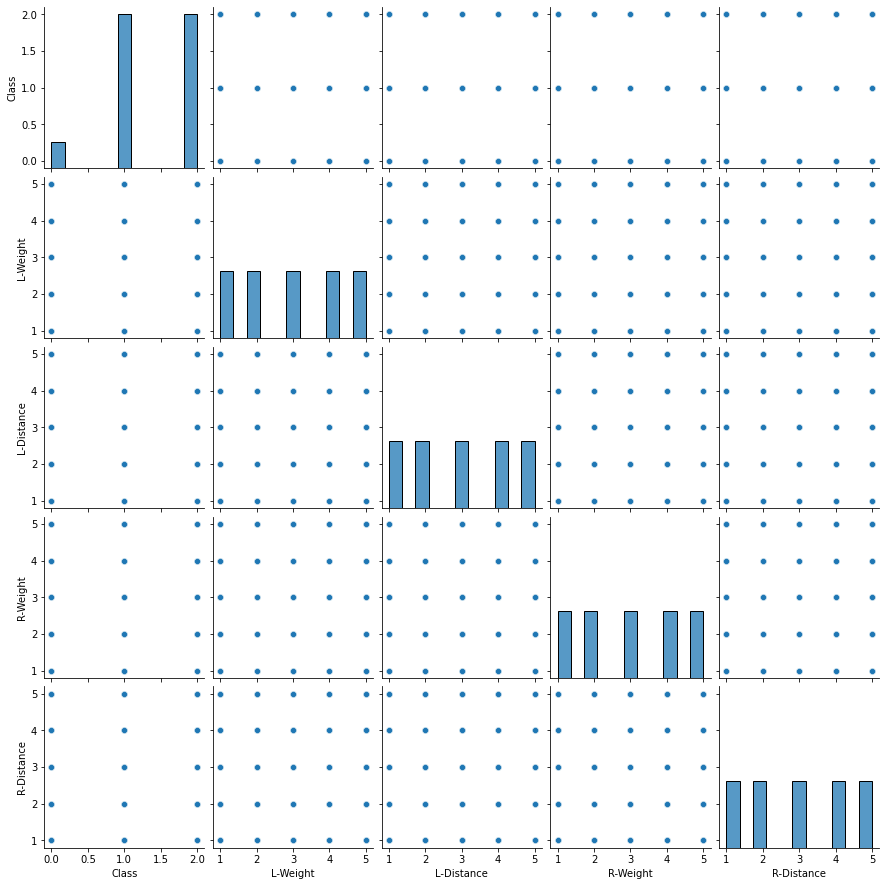

In [4]:
#Visualization after doing label encoding
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())
#pairplot
sns.pairplot(data=df)

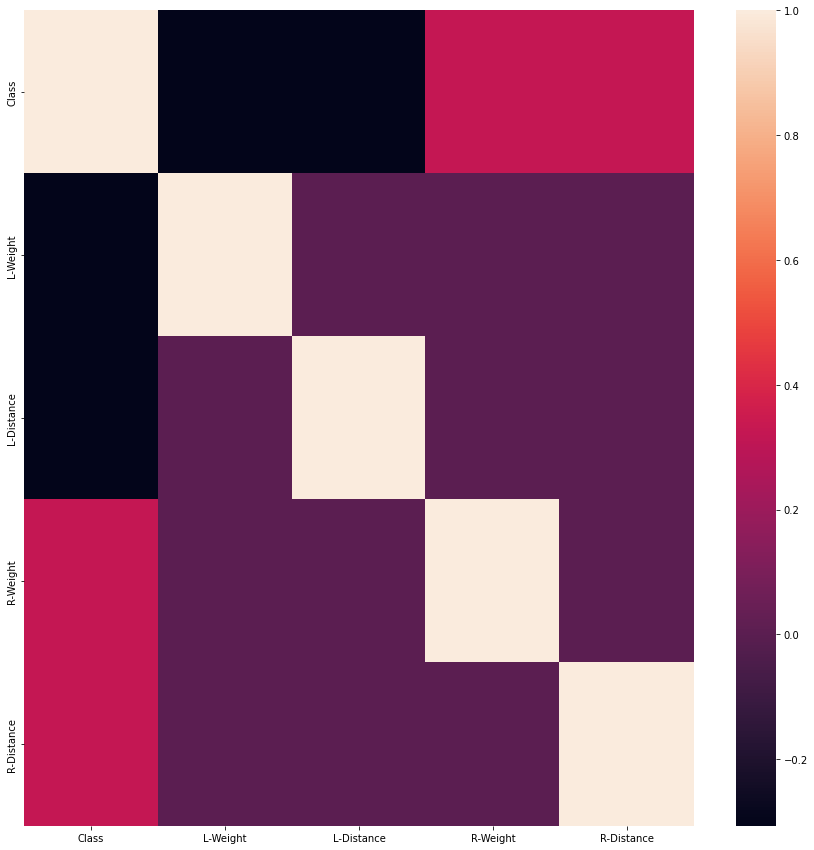

In [5]:
#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [6]:
#Dividing X and y
y = df[['Class']]
X = df.drop(['Class'], axis = 1)

print(y.head())
print(X.head())

   Class
0      0
1      2
2      2
3      2
4      2
   L-Weight  L-Distance  R-Weight  R-Distance
0         1           1         1           1
1         1           1         1           2
2         1           1         1           3
3         1           1         1           4
4         1           1         1           5


In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [8]:
#Classification and prediction
#Random Forest

clf1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf1.fit(train_X, train_y)
pred1 = clf1.predict(test_X)
print('Accuracy in percent = ',score(pred1, test_y)*100)

Accuracy in percent =  80.0


In [9]:
#DT

clf2 = DecisionTreeClassifier()
clf2.fit(train_X, train_y)
pred2 = clf2.predict(test_X)
print('Accuracy in percent = ',score(pred2, test_y)*100)

Accuracy in percent =  75.0


In [10]:
#SVM

clf3 = SVC()
clf3.fit(train_X, train_y)
pred3 = clf3.predict(test_X)
print('Accuracy in percent = ',score(pred3, test_y)*100)

Accuracy in percent =  90.0


In [11]:
#KNN

clf4 = KNeighborsClassifier(n_neighbors=9)
clf4.fit(train_X, train_y)
pred4 = clf4.predict(test_X)
print('Accuracy in percent = ',score(pred4, test_y)*100)

Accuracy in percent =  90.0
